<a href="https://colab.research.google.com/github/praveenhm/machine-learning-tutorials/blob/main/dataWrangling/notebooks/DW_Missing_Values_Treatment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Missing value treatment and its importance

The real-world data often has a lot of missing values. The cause of missing values can be data corruption or failure to record data. 

The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values.

Missing data might cause parameter estimations to be skewed.

It has the ability to reduce the representativeness of the sample.

It might make the analysis of the study more challenging.

## How to check for missing values

In [1]:
# Starting with the standard imports
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings ('ignore')  # suppress warning
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# Importing Dataset
data = pd.read_csv(r"../data/IOWA_DATA.csv")
print(data.shape)

(2197, 82)


In [3]:
data.head(5)


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,534,531363010,20,RL,80.0,9605,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,6,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1218.0,1218.0,GasA,Ex,Y,SBrkr,1218,0,0,1218,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Detchd,2007.0,RFn,2.0,576.0,TA,TA,Y,0,178,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,Normal,159000
1,803,906203120,20,RL,90.0,14684,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,7,1990,1991,Hip,CompShg,HdBoard,HdBoard,BrkFace,234.0,Gd,TA,CBlock,Gd,TA,Mn,ALQ,485.0,BLQ,177.0,1496.0,2158.0,GasA,Gd,Y,SBrkr,2196,0,0,2196,0.0,0.0,2,0,3,1,Gd,7,Typ,1,TA,Attchd,1990.0,RFn,3.0,701.0,TA,TA,Y,84,70,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,271900
2,956,916176030,20,RL,NaN,14375,Pave,NaN,IR1,Lvl,NoSeWa,CulDSac,Gtl,Timber,Norm,Norm,1Fam,SLvl,6,6,1958,1958,Gable,CompShg,HdBoard,HdBoard,BrkFace,541.0,TA,TA,CBlock,TA,TA,No,GLQ,111.0,Rec,354.0,354.0,819.0,GasA,Gd,Y,FuseA,1344,0,0,1344,0.0,1.0,1,0,3,1,Gd,7,Typ,1,Gd,Basment,1958.0,RFn,2.0,525.0,TA,TA,Y,0,118,0,0,233,0,NaN,NaN,NaN,0,1,2009,COD,Abnorml,137500
3,460,528180130,120,RL,48.0,6472,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,TwnhsE,1Story,9,5,2008,2008,Hip,CompShg,VinylSd,VinylSd,BrkFace,500.0,Ex,TA,PConc,Ex,TA,No,Unf,0.0,Unf,0.0,1451.0,1451.0,GasA,Ex,Y,SBrkr,1456,0,0,1456,0.0,0.0,2,0,2,1,Ex,6,Typ,1,Gd,Attchd,2008.0,RFn,2.0,539.0,TA,TA,Y,192,42,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,Normal,248500
4,487,528290030,80,RL,61.0,9734,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,RRAn,Norm,1Fam,SLvl,7,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,241.0,Rec,113.0,30.0,384.0,GasA,Ex,Y,SBrkr,744,630,0,1374,0.0,0.0,2,1,3,1,Gd,7,Typ,0,NaN,BuiltIn,2004.0,Fin,2.0,400.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal,167000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2197 entries, 0 to 2196
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2197 non-null   int64  
 1   PID              2197 non-null   int64  
 2   MS SubClass      2197 non-null   int64  
 3   MS Zoning        2197 non-null   object 
 4   Lot Frontage     1835 non-null   float64
 5   Lot Area         2197 non-null   int64  
 6   Street           2197 non-null   object 
 7   Alley            143 non-null    object 
 8   Lot Shape        2197 non-null   object 
 9   Land Contour     2197 non-null   object 
 10  Utilities        2197 non-null   object 
 11  Lot Config       2197 non-null   object 
 12  Land Slope       2197 non-null   object 
 13  Neighborhood     2197 non-null   object 
 14  Condition 1      2197 non-null   object 
 15  Condition 2      2197 non-null   object 
 16  Bldg Type        2197 non-null   object 
 17  House Style   

## Checking for missing values

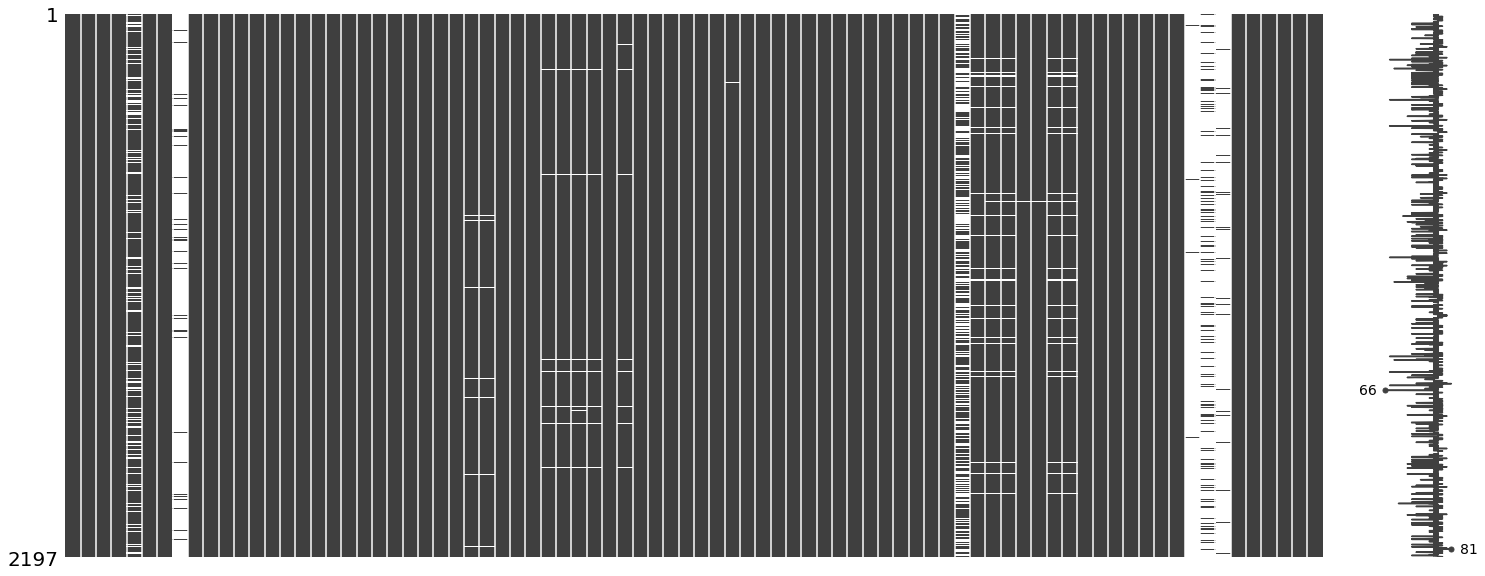

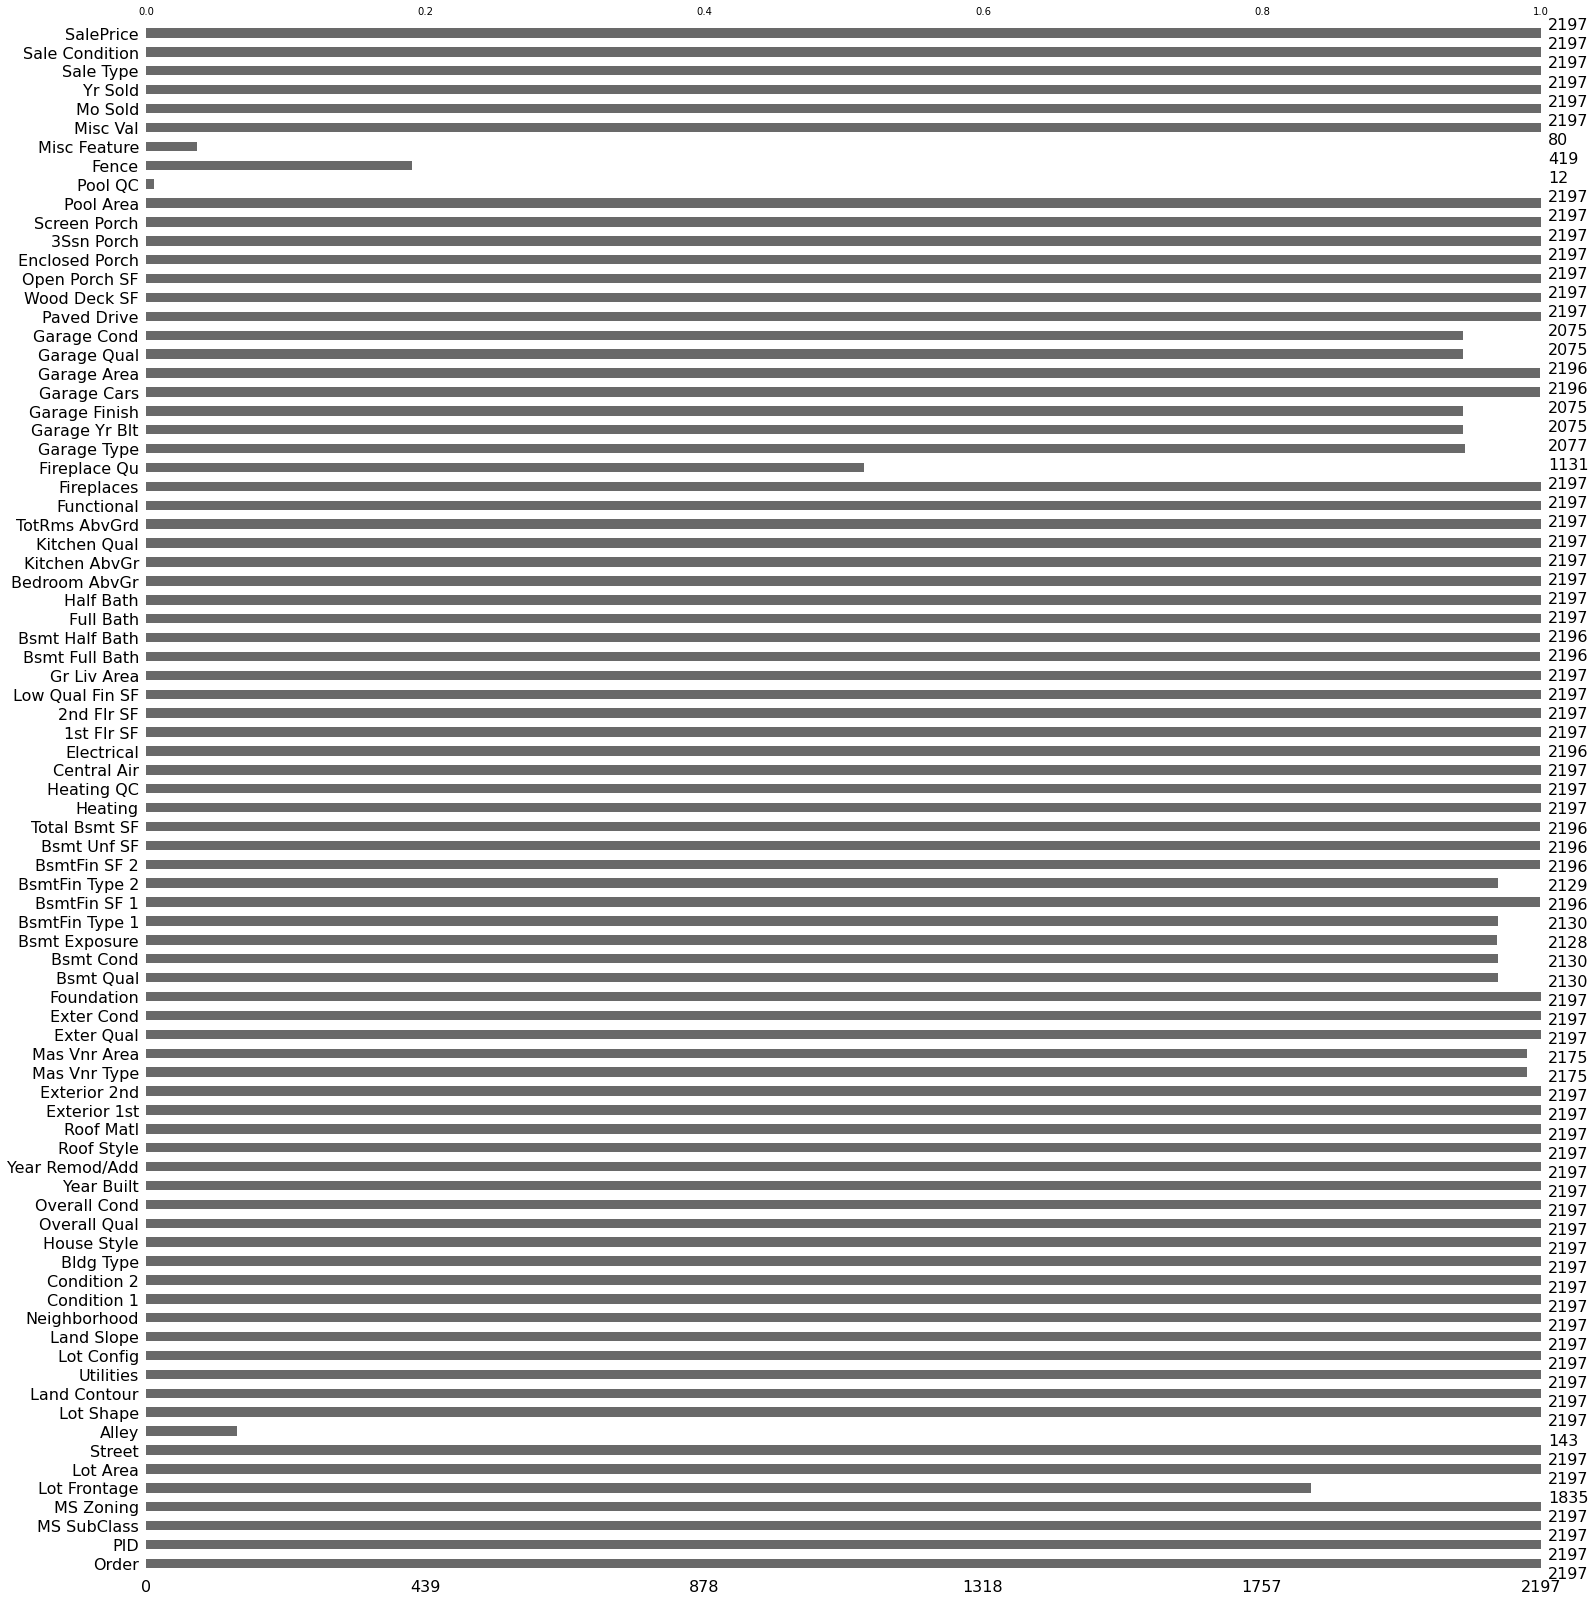

In [5]:
import missingno as msno
msno.matrix(data)
plt.show()
msno.bar(data)

plt.show()

In [6]:
features_with_na=[features for features in data.columns if data[features].isnull().sum()>1]
for feature in features_with_na:
    print(feature, np.round(data[feature].isnull().mean(), 4),  ' % missing values')


Lot Frontage 0.1648  % missing values
Alley 0.9349  % missing values
Mas Vnr Type 0.01  % missing values
Mas Vnr Area 0.01  % missing values
Bsmt Qual 0.0305  % missing values
Bsmt Cond 0.0305  % missing values
Bsmt Exposure 0.0314  % missing values
BsmtFin Type 1 0.0305  % missing values
BsmtFin Type 2 0.031  % missing values
Fireplace Qu 0.4852  % missing values
Garage Type 0.0546  % missing values
Garage Yr Blt 0.0555  % missing values
Garage Finish 0.0555  % missing values
Garage Qual 0.0555  % missing values
Garage Cond 0.0555  % missing values
Pool QC 0.9945  % missing values
Fence 0.8093  % missing values
Misc Feature 0.9636  % missing values



## Missing data can be classed into 3 types:

Reference: https://stefvanbuuren.name/fimd/sec-MCAR.html
#1 Missing Completly At Random (MCAR)
If the probability of being missing is the same for all cases, then the data are said to be missing completely at random (MCAR). 

This effectively implies that causes of the missing data are unrelated to the data. We may consequently ignore many of the complexities that arise because data are missing, apart from the obvious loss of information.

An example of MCAR is a weighing scale that ran out of batteries. Some of the data will be missing simply because of bad luck.

This can be handled by deleting rows or columns

# 2 Missing At Random (MAR)
If the probability of being missing is the same only within groups defined by the observed data, then the data are missing at random (MAR). 

MAR is a much broader class than MCAR. For example, when placed on a soft surface, a weighing scale may produce more missing values than when placed on a hard surface. Such data are thus not MCAR. If, however, we know surface type and if we can assume MCAR within the type of surface, then the data are MAR. Another example of MAR is when we take a sample from a population, where the probability to be included depends on some known property. MAR is more general and more realistic than MCAR. Modern missing data methods generally start from the MAR assumption.

MAR can be handled by imputation of data.

## 3 Missing not at Random (MNAR)
MNAR means that the probability of being missing varies for reasons that are unknown to us.

The MNAR data cases are a pain to deal with. Modelling the missing data is the only way to get a fair approximation of the parameters in this situation.

MNAR can be handled by getting more data.

# Categories of Missing values

Columns with missing values fall into the following categories:

Continuous variable or feature – Numerical data i.e., numbers may be of any kind

Categorical variable or feature – it may be numerical or objective kind. 

Ex: customer rating: Poor, Satisfactory,
Good, Better, Best, or Gender: Male or Female.

In [7]:
# Let us look at the numerical features in our dataset
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
data[numerical_features].head()

Number of numerical variables:  39


,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,534,531363010,20,80.0,9605,7,6,2007,2007,0.0,0.0,0.0,1218.0,1218.0,1218,0,0,1218,0.0,0.0,1,1,3,1,6,0,2007.0,2.0,576.0,0,178,0,0,0,0,0,4,2009,159000
1,803,906203120,20,90.0,14684,7,7,1990,1991,234.0,485.0,177.0,1496.0,2158.0,2196,0,0,2196,0.0,0.0,2,0,3,1,7,1,1990.0,3.0,701.0,84,70,0,0,0,0,0,6,2009,271900
2,956,916176030,20,NaN,14375,6,6,1958,1958,541.0,111.0,354.0,354.0,819.0,1344,0,0,1344,0.0,1.0,1,0,3,1,7,1,1958.0,2.0,525.0,0,118,0,0,233,0,0,1,2009,137500
3,460,528180130,120,48.0,6472,9,5,2008,2008,500.0,0.0,0.0,1451.0,1451.0,1456,0,0,1456,0.0,0.0,2,0,2,1,6,1,2008.0,2.0,539.0,192,42,0,0,0,0,0,4,2009,248500
4,487,528290030,80,61.0,9734,7,5,2004,2004,0.0,241.0,113.0,30.0,384.0,744,630,0,1374,0.0,0.0,2,1,3,1,7,0,2004.0,2.0,400.0,0,0,0,0,0,0,0,5,2009,167000


In [8]:
# Checking for categorical features
categorical_features=[feature for feature in data.columns if data[feature].dtypes=='O']
data[categorical_features].head()

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SawyerW,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Detchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,1Story,Hip,CompShg,HdBoard,HdBoard,BrkFace,Gd,TA,CBlock,Gd,TA,Mn,ALQ,BLQ,GasA,Gd,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,NoSeWa,CulDSac,Gtl,Timber,Norm,Norm,1Fam,SLvl,Gable,CompShg,HdBoard,HdBoard,BrkFace,TA,TA,CBlock,TA,TA,No,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,Gd,Basment,RFn,TA,TA,Y,NaN,NaN,NaN,COD,Abnorml
3,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,TwnhsE,1Story,Hip,CompShg,VinylSd,VinylSd,BrkFace,Ex,TA,PConc,Ex,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,Ex,Typ,Gd,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,RRAn,Norm,1Fam,SLvl,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,Mn,GLQ,Rec,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,BuiltIn,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [9]:
# Checking for missing values in categorical variables
data[categorical_features].isnull().sum()

MS Zoning            0
Street               0
Alley             2054
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        22
Exter Qual           0
Exter Cond           0
Foundation           0
Bsmt Qual           67
Bsmt Cond           67
Bsmt Exposure       69
BsmtFin Type 1      67
BsmtFin Type 2      68
Heating              0
Heating QC           0
Central Air          0
Electrical           1
Kitchen Qual         0
Functional           0
Fireplace Qu      1066
Garage Type        120
Garage Finish      122
Garage Qual        122
Garage Cond        122
Paved Drive          0
Pool QC           2185
Fence             1778
Misc Feature      2117
Sale Type            0
Sale Condition       0
dtype: int6

In [10]:
# Checking for number of missing values in numerical features
data[numerical_features].isnull().sum()


Order                0
PID                  0
MS SubClass          0
Lot Frontage       362
Lot Area             0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Mas Vnr Area        22
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Bsmt Full Bath       1
Bsmt Half Bath       1
Full Bath            0
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
TotRms AbvGrd        0
Fireplaces           0
Garage Yr Blt      122
Garage Cars          1
Garage Area          1
Wood Deck SF         0
Open Porch SF        0
Enclosed Porch       0
3Ssn Porch           0
Screen Porch         0
Pool Area            0
Misc Val             0
Mo Sold              0
Yr Sold              0
SalePrice            0
dtype: int64

## Methods to handle missing data

### 1 Not doing any changes and allowing the algorithm to decide the best ways to handle it. Algorithms like KNN, XGBoost and Naive Bayes approach.

All the machine learning algorithms don’t support missing values but some ML algorithms are robust to missing values in the dataset. The k-NN algorithm can ignore a column from a distance measure when a value is missing. Naive Bayes can also support missing values when making a prediction. These algorithms can be used when the dataset contains null or missing values.

The sklearn implementations of naive Bayes and k-Nearest Neighbors in Python do not support the presence of the missing values.

Another algorithm that can be used here is RandomForest that works well on non-linear and categorical data. It adapts to the data structure taking into consideration the high variance or the bias, producing better results on large datasets.

Pros:
No need to handle missing values in each column as ML algorithms will handle them efficiently.

Cons:
No implementation of these ML algorithms in the scikit-learn library.

### 2 Dropping rows or columns if it is not in use for the machine learning and OK to drop without having impact on the data.

Pro: Improves the robustness of the algorithm.
Cons: Can result in loss of information if not done carefully.

In [11]:
# In our dataset we can drop a few columns which do not add value or have more than 50% missing values for building our model
data.drop(['Order','PID','Misc Feature','Pool QC','Alley','Fence','Fireplace Qu'],axis=1,inplace=True)
data.shape

(2197, 75)

In [12]:
# Deleting rows of data which have missing values and are not needed
data['MS Zoning'].value_counts()

RL         1704
RM          340
FV          113
C (all)      19
RH           17
I (all)       2
A (agr)       2
Name: MS Zoning, dtype: int64

In [13]:
#deleting all data rows with MSZoning = commercial, agriculture and industrial as these are not housing units
data = data[(data['MS Zoning'] != 'C (all)') & (data['MS Zoning'] != 'I (all)') & (data['MS Zoning']!= 'A (agr)')]

### 3 Imputation by mean
Compute the mean of a column’s non-missing values, and then replace the missing values in each column separately and independently of the others. 
We need to perform outlier treatment, as a skewed mean value will almost certainly be substituted, lowering the model’s overall quality.

Cons: Works only with numerical datasets and failed in covariance between the independent variables

In [14]:
data['Lot Frontage']=data['Lot Frontage'].fillna(data['Lot Frontage'].mean()) 

### 4 Imputation by Median
This addresses the outlier problem as we will use the median. When sorted, it ignores the influence of outliers and updates the middle value that occurred in that column.

Cons: Works only with numerical datasets and failed in covariance between the independent variables

In [15]:
data['Bsmt Unf SF']=data['Bsmt Unf SF'].fillna(data['Bsmt Unf SF'].median())

### 5 Imputation by Mode
This method may be applied to categorical variables with a finite set of values. 

To impute, you can use the most common value.

Con: This method ignores feature connections, there is a danger of data bias. If the category values aren’t balanced, you’re more likely to introduce bias into the data (class imbalance problem).

Pros: Works with all formats of data.

Cons: Covariance value cannot be predicted between independent features

In [16]:
data['Bsmt Full Bath']=data['Bsmt Full Bath'].fillna(data['Bsmt Full Bath'].mode()[0])
data['Bsmt Half Bath']=data['Bsmt Half Bath'].fillna(data['Bsmt Half Bath'].mode()[0])
data['Mas Vnr Type']=data['Mas Vnr Type'].fillna(data['Mas Vnr Type'].mode()[0])
data['Bsmt Cond']=data['Bsmt Cond'].fillna(data['Bsmt Cond'].mode()[0])
data['Bsmt Qual']=data['Bsmt Qual'].fillna(data['Bsmt Qual'].mode()[0])
data['Garage Finish']=data['Garage Finish'].fillna(data['Garage Finish'].mode()[0])
data['Garage Qual']=data['Garage Qual'].fillna(data['Garage Qual'].mode()[0])
data['Garage Type']=data['Garage Type'].fillna(data['Garage Type'].mode()[0])


### 6. Imputation for Categorical values:
When categorical columns have missing values, the most prevalent category may be utilized to fill in the gaps. If there are many missing values, a new category can be created to replace them.

Pros: Good for small datasets. Compliments the loss by inserting the new category

Cons: Cant able to use for other than
categorical data, additional encoded features may result in a drop in of accuracy

In [17]:
data['Garage Cond'].value_counts()

TA    1985
Fa      52
Gd      11
Po      11
Ex       3
Name: Garage Cond, dtype: int64

In [18]:
data["Garage Cond"] = data["Garage Cond"].fillna('Filled_value')

In [19]:
data['Garage Cond'].value_counts()

TA              1985
Filled_value     112
Fa                52
Gd                11
Po                11
Ex                 3
Name: Garage Cond, dtype: int64

### 7. Last observation carried forward (LOCF)
It is a common statistical approach for the analysis of longitudinal repeated measures data when some follow-up observations are missing.

https://www.sciencedirect.com/topics/mathematics/handling-missing-data

In [20]:
data["Garage Yr Blt"] = data["Garage Yr Blt"].fillna(method ='ffill')
data['BsmtFin Type 1']=data['BsmtFin Type 1'].fillna(method ='ffill')
data['BsmtFin Type 2']=data['BsmtFin Type 2'].fillna(method ='ffill')
data['Bsmt Exposure']=data['Bsmt Exposure'].fillna(method ='ffill')


### 8. Interpolation – Linear
It’s the method of approximating a missing value by joining dots in increasing order along a straight line.  It calculates the unknown value in the same ascending order as the values that came before it.

In [21]:
data["Mas Vnr Area"].head()

0      0.0
1    234.0
2    541.0
3    500.0
4      0.0
Name: Mas Vnr Area, dtype: float64

In [22]:
data["Mas Vnr Area"] = data["Mas Vnr Area"].interpolate(method='linear', limit_direction='forward', axis=0)

In [23]:
data["Mas Vnr Area"].isnull().sum()

0

In [24]:
data.isnull().sum()

MS SubClass        0
MS Zoning          0
Lot Frontage       0
Lot Area           0
Street             0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Type       0
Mas Vnr Area       0
Exter Qual         0
Exter Cond         0
Foundation         0
Bsmt Qual          0
Bsmt Cond          0
Bsmt Exposure      0
BsmtFin Type 1     0
BsmtFin SF 1       1
BsmtFin Type 2     0
BsmtFin SF 2       1
Bsmt Unf SF        0
Total Bsmt SF      1
Heating            0
Heating QC         0
Central Air        0
Electrical         1
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
Bsmt Half Bath     0
Full Bath    

In [25]:
data = data.dropna() # Deleting single rows with missing values

In [26]:
data.isnull().sum()

MS SubClass        0
MS Zoning          0
Lot Frontage       0
Lot Area           0
Street             0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Type       0
Mas Vnr Area       0
Exter Qual         0
Exter Cond         0
Foundation         0
Bsmt Qual          0
Bsmt Cond          0
Bsmt Exposure      0
BsmtFin Type 1     0
BsmtFin SF 1       0
BsmtFin Type 2     0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
Heating            0
Heating QC         0
Central Air        0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
Bsmt Half Bath     0
Full Bath    

### Building a simple regression model 

In [27]:
# Checking for categorical features
categorical_features=[feature for feature in data.columns if data[feature].dtypes=='O']
data[categorical_features].head()

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
0,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,SawyerW,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Detchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,1Story,Hip,CompShg,HdBoard,HdBoard,BrkFace,Gd,TA,CBlock,Gd,TA,Mn,ALQ,BLQ,GasA,Gd,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,NoSeWa,CulDSac,Gtl,Timber,Norm,Norm,1Fam,SLvl,Gable,CompShg,HdBoard,HdBoard,BrkFace,TA,TA,CBlock,TA,TA,No,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,Basment,RFn,TA,TA,Y,COD,Abnorml
3,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,TwnhsE,1Story,Hip,CompShg,VinylSd,VinylSd,BrkFace,Ex,TA,PConc,Ex,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,Ex,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,RRAn,Norm,1Fam,SLvl,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,Mn,GLQ,Rec,GasA,Ex,Y,SBrkr,Gd,Typ,BuiltIn,Fin,TA,TA,Y,WD,Normal


In [28]:
data = pd.get_dummies(data=data,columns=categorical_features,drop_first=True)

In [29]:
# Defining the y and X 
y = data['SalePrice']
data.drop(['SalePrice'],axis=1,inplace=True) # X

In [30]:
# Preprocessing data
from sklearn.model_selection import train_test_split     # data-splitter
from sklearn.preprocessing import StandardScaler  
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=8)

In [31]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [32]:
# Simple linear regression
# --For Regressor
from sklearn.linear_model import LinearRegression        # linear regression
from sklearn.metrics import mean_squared_error, r2_score # model-metrics


linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
labels = linear_model.predict(X_test)

# Check how good are the predictions?
mse         = mean_squared_error(y_test, labels)
print(f"Mean squared error: {mse:.2f}")
r2 = r2_score(y_test, labels)
print(rf"Coefficient of Determination (R^2):{r2:0.4f}")
print(rf'Model coefficients are: {linear_model.coef_}')

Mean squared error: 9535412943693546885593884528738304.00
Coefficient of Determination (R^2):-1402723979561151523454976.0000
Model coefficients are: [-1.83668718e+03  8.38428491e+02  3.52765674e+03  1.03626538e+04
  6.14264326e+03  6.88984110e+03  2.39932080e+03  1.90747931e+03
  3.35764090e+16  1.21626034e+16  3.37172624e+16 -3.32348180e+16
  5.41087668e+16  5.90334799e+16  6.75628074e+15 -6.96145866e+16
  1.61180196e+02 -1.09877075e+03  2.78300219e+03  2.26359056e+03
 -2.69331801e+03 -1.23678863e+03 -1.02712672e+03  2.91941085e+03
  1.35247119e+03  2.81285213e+03  4.38183950e+03  1.75638236e+03
 -1.74198180e+03 -6.06992908e+02 -4.58676244e+02  2.87215172e+03
  4.83750659e+03 -8.86000000e+03 -8.93000000e+02 -1.41656250e+03
 -4.69000000e+02 -1.44150000e+03 -2.84500000e+03  5.63250000e+02
  7.07000000e+02  1.30350000e+03  5.48000000e+02  2.12700000e+03
 -2.36000000e+02  3.05950000e+03 -5.54250000e+02 -2.61000000e+02
  3.84500000e+02 -1.80700000e+03 -1.00150000e+03 -1.45000000e+03
  2.04